In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
revtimes = pd.read_pickle('../data/revs_timedata.pk')
rectimes =pd.read_pickle('../data/rec_timedata.pk')
recipe_ids = list(set(rectimes.index).intersection(set(revtimes.RecipeId.values)))
revtimes = revtimes[revtimes['RecipeId'].isin(recipe_ids)]
revtimes['RecipeDate'] = [rectimes[r] for r in revtimes.RecipeId]



In [14]:
revtimes

,UserId,RecipeId,DateSubmitted,DateModified,Rating,RecipeDate
0,2008,992,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00,5,1999-09-06 04:28:00+00:00
1,1634,4384,2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00,4,1999-11-29 23:41:00+00:00
2,2046,4523,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00,2,1999-11-15 05:00:00+00:00
3,1773,7435,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00,5,2000-03-11 15:27:00+00:00
4,2085,44,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00,5,1999-09-17 04:47:00+00:00
...,...,...,...,...,...,...
1401977,2002080368,139499,2020-12-27 23:57:54+00:00,2020-12-27 23:57:54+00:00,2,2005-09-29 18:30:00+00:00
1401978,41805321,148484,2020-12-28 00:44:42+00:00,2020-12-28 00:44:42+00:00,5,2005-12-18 14:15:00+00:00
1401979,2002901848,264191,2020-12-28 01:04:43+00:00,2020-12-28 01:04:43+00:00,5,2007-11-07 16:43:00+00:00
1401980,2002901938,411791,2020-12-28 03:07:10+00:00,2020-12-28 03:07:10+00:00,5,2010-02-04 16:14:00+00:00


In [27]:
pd.Timedelta(datelist[0]-datelist[1]).days

-631

In [29]:
revtimes['TimeToReview']=[td.days for td in revtimes.DateSubmitted-revtimes.RecipeDate]

In [37]:
revtimes.loc[revtimes.DateModified.apply(lambda x : x.year)<2020]

,UserId,RecipeId,DateSubmitted,DateModified,Rating,RecipeDate,TimeToReview
0,2008,992,2000-01-25 21:44:00+00:00,2000-01-25 21:44:00+00:00,5,1999-09-06 04:28:00+00:00,141
1,1634,4384,2001-10-17 16:49:59+00:00,2001-10-17 16:49:59+00:00,4,1999-11-29 23:41:00+00:00,687
2,2046,4523,2000-02-25 09:00:00+00:00,2000-02-25 09:00:00+00:00,2,1999-11-15 05:00:00+00:00,102
3,1773,7435,2000-03-13 21:15:00+00:00,2000-03-13 21:15:00+00:00,5,2000-03-11 15:27:00+00:00,2
4,2085,44,2000-03-28 12:51:00+00:00,2000-03-28 12:51:00+00:00,5,1999-09-17 04:47:00+00:00,193
...,...,...,...,...,...,...,...
1390779,2002601149,465490,2019-12-31 21:11:41+00:00,2019-12-31 21:11:41+00:00,5,2011-10-04 23:15:00+00:00,3009
1390780,2002601182,208188,2019-12-31 21:41:11+00:00,2019-12-31 21:41:11+00:00,5,2007-01-30 17:14:00+00:00,4718
1390781,2002601233,72826,2019-12-31 22:15:09+00:00,2019-12-31 22:15:09+00:00,5,2003-10-08 20:00:00+00:00,5928
1390782,208158,50589,2019-12-31 22:44:49+00:00,2019-12-31 22:44:49+00:00,5,2003-01-10 20:11:00+00:00,6199


In [58]:
revtimes['UserId'].value_counts()

UserId
424680        8842
37449         6605
383346        5438
128473        4693
169430        4586
              ... 
1701969          1
1585419          1
1704446          1
1417548          1
2002812127       1
Name: count, Length: 271906, dtype: int64

<Axes: >

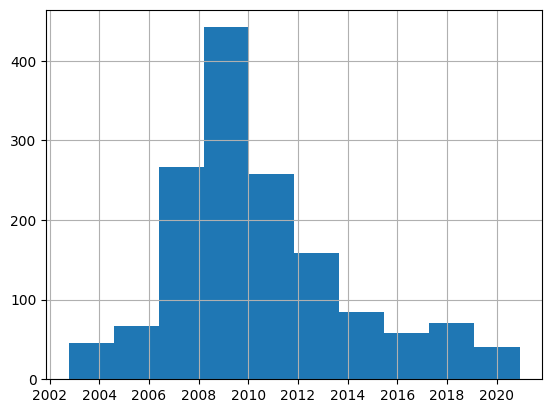

In [57]:
revtimes.loc[revtimes.RecipeId == 39087].DateSubmitted.hist()

In [ ]:
revtimes.loc[revtimes.RecipeId == 39087].DateSubmitted.hist()

In [31]:
revtimes['Date'].value_counts()

Date
2008-01-02 00:00:00+00:00    909
2008-01-28 00:00:00+00:00    863
2009-01-02 00:00:00+00:00    852
2009-01-11 00:00:00+00:00    833
2008-02-04 00:00:00+00:00    827
                            ... 
2001-02-14 00:00:00+00:00      1
2000-08-27 00:00:00+00:00      1
2000-08-02 00:00:00+00:00      1
2000-07-19 00:00:00+00:00      1
2000-01-26 00:00:00+00:00      1
Name: count, Length: 7127, dtype: int64

In [62]:
user_list = list(revtimes.UserId.unique())
user_counts = revtimes['UserId'].value_counts()

In [63]:
user_list.sort(key = lambda x: user_counts[x])

In [64]:
user_list[-10:]

[305531, 133174, 199848, 58104, 89831, 169430, 128473, 383346, 37449, 424680]

<Axes: >

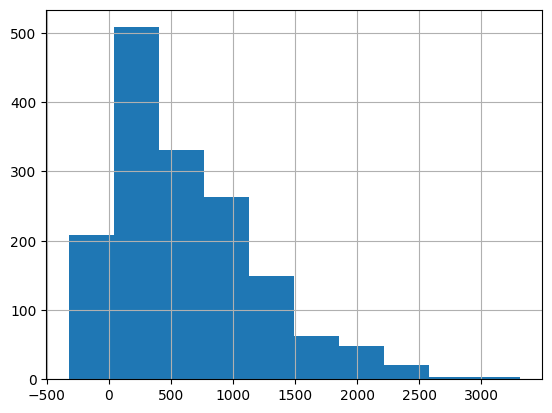

In [78]:
revtimes.loc[revtimes.UserId == user_list[-60]].TimeToReview.hist()

<Axes: >

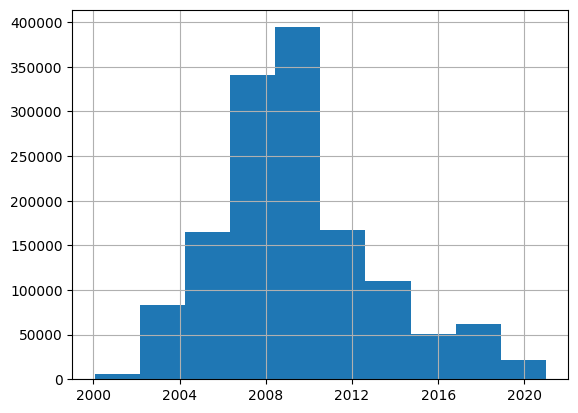

In [79]:
revtimes.DateModified.hist()

<Axes: >

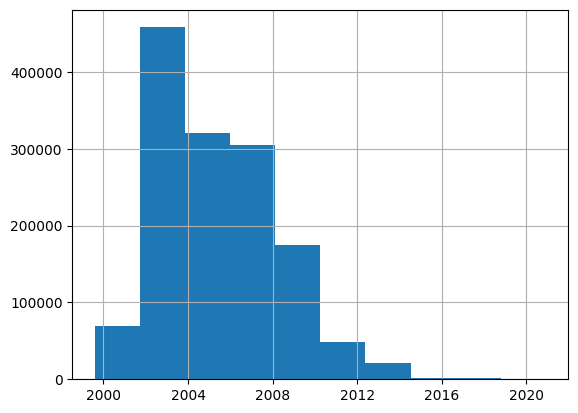

In [80]:
revtimes.RecipeDate.hist()